<a href="https://colab.research.google.com/github/msiplab/VieWork/blob/master/vie_sec7_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フーリエ解析


## 画像ファイルの準備
以下では、画像ファイルを手元からアップロードする方法とURLを指定してアクセスする方法のいずれかを利用してください。
### アップロードする方法

In [11]:
#from google.colab import files
#uploaded_file = files.upload()

In [12]:
#file_name = next(iter(uploaded_file))
#print(file_name)

### URLを指定してアクセスする方法
- 参照サイト：　http://homepages.cae.wisc.edu/~ece533/images/

In [13]:
import urllib.request
import io

url = 'http://homepages.cae.wisc.edu/~ece533/images/barbara.png'
file_name = io.BytesIO(urllib.request.urlopen(url).read())

## 画像の読み込み
画像処理ライブラリ Scikit-image (skimage) を利用

In [14]:
from skimage import io
img = io.imread(file_name)
img.dtype

dtype('uint8')

## 画像の表示
可視化ライブラリMatplotlibを利用

Text(0.5, 1.0, 'Original')

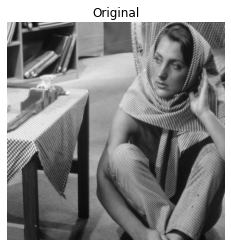

In [15]:
from matplotlib import pyplot as plt

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original")

# 二次元離散フーリエ変換


Text(0.5, 1.0, 'Reconstruction')

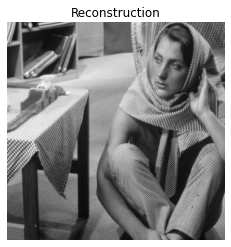

In [16]:
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift 
import numpy as np

frq = fft2(img)
rec = np.real(ifft2(frq))
plt.imshow(rec,cmap="gray")
plt.axis("off")
plt.title("Reconstruction")



## 振幅特性



Text(0.5, 1.0, 'Amplitude')

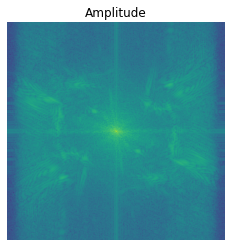

In [17]:
amp = np.abs(frq)
ampdb = 20*np.log10(amp)
plt.imshow(fftshift(ampdb))
plt.axis("off")
plt.title("Amplitude")



振幅特性のみによる逆離散フーリエ変換

Text(0.5, 1.0, 'Reconstruction by amplitude')

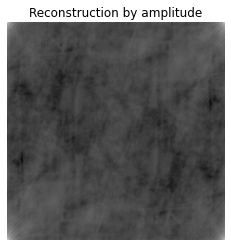

In [18]:
recamp = np.real(ifft2(amp))
plt.imshow(20*np.log10(recamp),cmap="gray")
plt.axis("off")
plt.title("Reconstruction by amplitude")

## 位相特性


Text(0.5, 1.0, 'Phase')

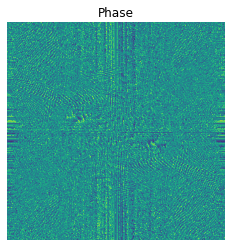

In [19]:
phs = np.angle(frq)
phspls = (phs + np.pi)/(2*np.pi)
plt.imshow(fftshift(phspls))
plt.axis("off")
plt.title("Phase")

位相特性のみによる逆離散フーリエ変換

Text(0.5, 1.0, 'Reconstruction by phase')

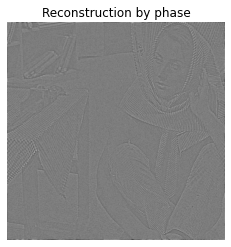

In [20]:
recphs = np.real(ifft2(np.exp(1j*phs)))
plt.imshow(recphs,cmap="gray")
plt.axis("off")
plt.title("Reconstruction by phase")